In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
# Select the features for correlation matrix
selected_features = ['id','deviceid','trip_id','speed','acceleration','radial_acceleration','distance_from_start','acceleration_der','bus_stop']


In [3]:
data = pd.read_csv('../DataOut/bus_trip_all_points_with_acceleration_and_radial_acceleration_and_distance_and_accDiff.csv')
# set Nan in bus_stop to 0
data['bus_stop']=data['bus_stop'].fillna(0)
datain_one_direction=data[data['direction']==1]
datain_one_direction=datain_one_direction[selected_features]

In [23]:
# print a list of unique trip ids
trip_ids = datain_one_direction['trip_id'].unique()
# convert the list values to int
trip_ids = [int(x) for x in trip_ids]
print('unique trip ids: {}'.format(trip_ids))
# print length
print('length of unique trip ids: {}'.format(len(trip_ids)))

unique trip ids: [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199, 201, 203, 205, 207, 209, 211, 213, 215, 226, 228, 230, 232, 234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258, 260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284, 286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310, 312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336, 338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358, 360, 362, 364, 366, 368, 370, 372, 374, 382, 384, 386, 388, 390, 392, 394, 396, 398, 400, 402, 404, 406, 408, 410, 412, 414, 416, 418, 420, 422, 424, 426, 428, 430, 432, 434

In [22]:
data

,id,deviceid,devicetime,latitude,longitude,speed,date,time,geometry,bus_stop,trip_id,direction,acceleration,radial_acceleration,distance_from_start,time_diff,acc_diff,acceleration_der
0,574733100,116,2021-10-16 08:03:34,7.293043,80.637552,10.25920,2021-10-16,08:03:34,POINT (184964.84865244984 232317.35306792473),0,2.0,1,-0.251980,1.278067,123.738485,0 days 00:00:15,-0.575955,-0.038397
1,574733101,116,2021-10-16 08:03:49,7.292725,80.637707,7.55940,2021-10-16,08:03:49,POINT (184981.95255171193 232282.14959255166),0,2.0,1,-0.179987,0.722300,163.044397,0 days 00:00:15,0.071993,0.004800
2,574733102,116,2021-10-16 08:04:04,7.292292,80.637663,3.77970,2021-10-16,08:04:04,POINT (184977.15733984314 232234.22458233108),0,2.0,1,-0.251980,0.048332,211.472339,0 days 00:00:15,-0.071993,-0.004800
3,574736662,116,2021-10-16 08:04:19,7.291640,80.637455,9.17927,2021-10-16,08:04:19,POINT (184954.1363920236 232162.16484193364),101,2.0,1,0.359971,1.052222,287.492821,0 days 00:00:15,0.611951,0.040797
4,574736663,116,2021-10-16 08:04:34,7.291210,80.637713,8.63931,2021-10-16,08:04:34,POINT (184982.64260533327 232114.61697960715),101,2.0,1,-0.035997,0.639311,343.141212,0 days 00:00:15,-0.395969,-0.026398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243130,1310926397,262,2022-08-09 10:55:05,7.290370,80.638812,20.51840,2022-08-09,10:55:05,POINT (185103.88471817068 232021.69189563429),0,5586.0,2,-0.539900,4.312238,16062.472333,0 days 00:00:01,-0.694171,-0.694171
1243131,1310926396,262,2022-08-09 10:55:37,7.291380,80.637410,7.55940,2022-08-09,10:55:37,POINT (184949.15914480377 232133.4259444512),0,5586.0,2,-0.404969,0.096588,16253.551165,0 days 00:00:32,0.134931,0.004217
1243132,1310926395,262,2022-08-09 10:55:38,7.291392,80.637387,7.55940,2022-08-09,10:55:38,POINT (184946.57580228115 232134.70946937904),0,5586.0,2,0.000000,0.588683,16256.436454,0 days 00:00:01,0.404969,0.404969
1243133,1310926393,262,2022-08-09 10:55:53,7.291295,80.636463,12.95900,2022-08-09,10:55:53,POINT (184844.62591334787 232124.05764201845),0,5586.0,2,0.359973,0.563965,16358.837456,0 days 00:00:15,0.359973,0.023998


In [5]:
datain_one_direction

,id,deviceid,trip_id,speed,acceleration,radial_acceleration,distance_from_start,acceleration_der,bus_stop
0,574733100,116,2.0,10.25920,-0.251980,1.278067,123.738485,-0.038397,0
1,574733101,116,2.0,7.55940,-0.179987,0.722300,163.044397,0.004800,0
2,574733102,116,2.0,3.77970,-0.251980,0.048332,211.472339,-0.004800,0
3,574736662,116,2.0,9.17927,0.359971,1.052222,287.492821,0.040797,101
4,574736663,116,2.0,8.63931,-0.035997,0.639311,343.141212,-0.026398,101
...,...,...,...,...,...,...,...,...,...
624811,1310920500,262,5587.0,2.15983,-0.057853,0.017268,16959.169925,-0.014922,0
624812,1310920499,262,5587.0,2.15983,0.000000,0.050073,17123.789768,0.001653,0
624813,1310920498,262,5587.0,2.69978,0.539950,0.056444,17175.357332,0.539950,0
624814,1310920497,262,5587.0,5.39957,0.674947,0.062833,17309.762484,0.033749,0


In [6]:
busstops=[]
start_and_end_distances_to_busstops=[]
prev_stop=0
current_stop=0
# iterate through rows in dataframes_without_trip_id[1]
for index, row in datain_one_direction[datain_one_direction['trip_id']==4].iterrows():
    current_stop=row['bus_stop']
    if current_stop!=prev_stop:
        if prev_stop==0:
            busstops.append(current_stop)
            start_point=int(row['distance_from_start'])   
        else:
            end_point=int(row['distance_from_start'])
            start_and_end_distances_to_busstops.append([start_point,end_point])
    prev_stop=current_stop

In [7]:
print(busstops, start_and_end_distances_to_busstops)

['101', '102', '103', '104', '105', '106', '107', '108', '110', '111', '112', '113', '114', 'BT02'] [[371, 531], [1399, 1718], [3534, 3699], [5029, 5261], [5909, 6180], [7120, 7334], [7495, 7757], [8087, 8369], [8087, 8588], [9603, 9820], [10703, 10938], [12058, 12257], [13144, 13361], [14019, 14180]]


In [8]:
temp_df=pd.DataFrame()
for x in datain_one_direction.trip_id.unique():
    df=datain_one_direction[datain_one_direction['trip_id']==x]
    i=0
    for index, row in df.iterrows():
        if row['bus_stop']==0:
            datain_one_direction.loc[index,'segment']=i+1
        elif row['bus_stop']==busstops[i]:
            datain_one_direction.loc[index,'segment']=0
            i+=1
        else:
            datain_one_direction.loc[index,'segment']=0

In [9]:
datain_one_direction

,id,deviceid,trip_id,speed,acceleration,radial_acceleration,distance_from_start,acceleration_der,bus_stop,segment
0,574733100,116,2.0,10.25920,-0.251980,1.278067,123.738485,-0.038397,0,1.0
1,574733101,116,2.0,7.55940,-0.179987,0.722300,163.044397,0.004800,0,1.0
2,574733102,116,2.0,3.77970,-0.251980,0.048332,211.472339,-0.004800,0,1.0
3,574736662,116,2.0,9.17927,0.359971,1.052222,287.492821,0.040797,101,0.0
4,574736663,116,2.0,8.63931,-0.035997,0.639311,343.141212,-0.026398,101,0.0
...,...,...,...,...,...,...,...,...,...,...
624811,1310920500,262,5587.0,2.15983,-0.057853,0.017268,16959.169925,-0.014922,0,6.0
624812,1310920499,262,5587.0,2.15983,0.000000,0.050073,17123.789768,0.001653,0,6.0
624813,1310920498,262,5587.0,2.69978,0.539950,0.056444,17175.357332,0.539950,0,6.0
624814,1310920497,262,5587.0,5.39957,0.674947,0.062833,17309.762484,0.033749,0,6.0


In [10]:
df_for_segment_avg=datain_one_direction[datain_one_direction['segment']!=0]
# drop the columns that are not needed
df_for_segment_avg=df_for_segment_avg.drop(columns=['distance_from_start','bus_stop','id'])

df_for_busstop_avg=datain_one_direction[datain_one_direction['bus_stop']!=0]
# drop the columns that are not needed
df_for_busstop_avg=df_for_busstop_avg.drop(columns=['distance_from_start','segment','id'])

In [11]:
df_for_segment_avg

,deviceid,trip_id,speed,acceleration,radial_acceleration,acceleration_der,segment
0,116,2.0,10.25920,-0.251980,1.278067,-0.038397,1.0
1,116,2.0,7.55940,-0.179987,0.722300,0.004800,1.0
2,116,2.0,3.77970,-0.251980,0.048332,-0.004800,1.0
9,116,2.0,9.17927,0.179986,0.546434,-0.016799,2.0
10,116,2.0,8.63931,-0.035997,0.096457,-0.014399,2.0
...,...,...,...,...,...,...,...
624810,262,5587.0,3.77970,0.359973,0.062196,-0.059994,6.0
624811,262,5587.0,2.15983,-0.057853,0.017268,-0.014922,6.0
624812,262,5587.0,2.15983,0.000000,0.050073,0.001653,6.0
624813,262,5587.0,2.69978,0.539950,0.056444,0.539950,6.0


In [12]:
data

,id,deviceid,devicetime,latitude,longitude,speed,date,time,geometry,bus_stop,trip_id,direction,acceleration,radial_acceleration,distance_from_start,time_diff,acc_diff,acceleration_der
0,574733100,116,2021-10-16 08:03:34,7.293043,80.637552,10.25920,2021-10-16,08:03:34,POINT (184964.84865244984 232317.35306792473),0,2.0,1,-0.251980,1.278067,123.738485,0 days 00:00:15,-0.575955,-0.038397
1,574733101,116,2021-10-16 08:03:49,7.292725,80.637707,7.55940,2021-10-16,08:03:49,POINT (184981.95255171193 232282.14959255166),0,2.0,1,-0.179987,0.722300,163.044397,0 days 00:00:15,0.071993,0.004800
2,574733102,116,2021-10-16 08:04:04,7.292292,80.637663,3.77970,2021-10-16,08:04:04,POINT (184977.15733984314 232234.22458233108),0,2.0,1,-0.251980,0.048332,211.472339,0 days 00:00:15,-0.071993,-0.004800
3,574736662,116,2021-10-16 08:04:19,7.291640,80.637455,9.17927,2021-10-16,08:04:19,POINT (184954.1363920236 232162.16484193364),101,2.0,1,0.359971,1.052222,287.492821,0 days 00:00:15,0.611951,0.040797
4,574736663,116,2021-10-16 08:04:34,7.291210,80.637713,8.63931,2021-10-16,08:04:34,POINT (184982.64260533327 232114.61697960715),101,2.0,1,-0.035997,0.639311,343.141212,0 days 00:00:15,-0.395969,-0.026398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243130,1310926397,262,2022-08-09 10:55:05,7.290370,80.638812,20.51840,2022-08-09,10:55:05,POINT (185103.88471817068 232021.69189563429),0,5586.0,2,-0.539900,4.312238,16062.472333,0 days 00:00:01,-0.694171,-0.694171
1243131,1310926396,262,2022-08-09 10:55:37,7.291380,80.637410,7.55940,2022-08-09,10:55:37,POINT (184949.15914480377 232133.4259444512),0,5586.0,2,-0.404969,0.096588,16253.551165,0 days 00:00:32,0.134931,0.004217
1243132,1310926395,262,2022-08-09 10:55:38,7.291392,80.637387,7.55940,2022-08-09,10:55:38,POINT (184946.57580228115 232134.70946937904),0,5586.0,2,0.000000,0.588683,16256.436454,0 days 00:00:01,0.404969,0.404969
1243133,1310926393,262,2022-08-09 10:55:53,7.291295,80.636463,12.95900,2022-08-09,10:55:53,POINT (184844.62591334787 232124.05764201845),0,5586.0,2,0.359973,0.563965,16358.837456,0 days 00:00:15,0.359973,0.023998


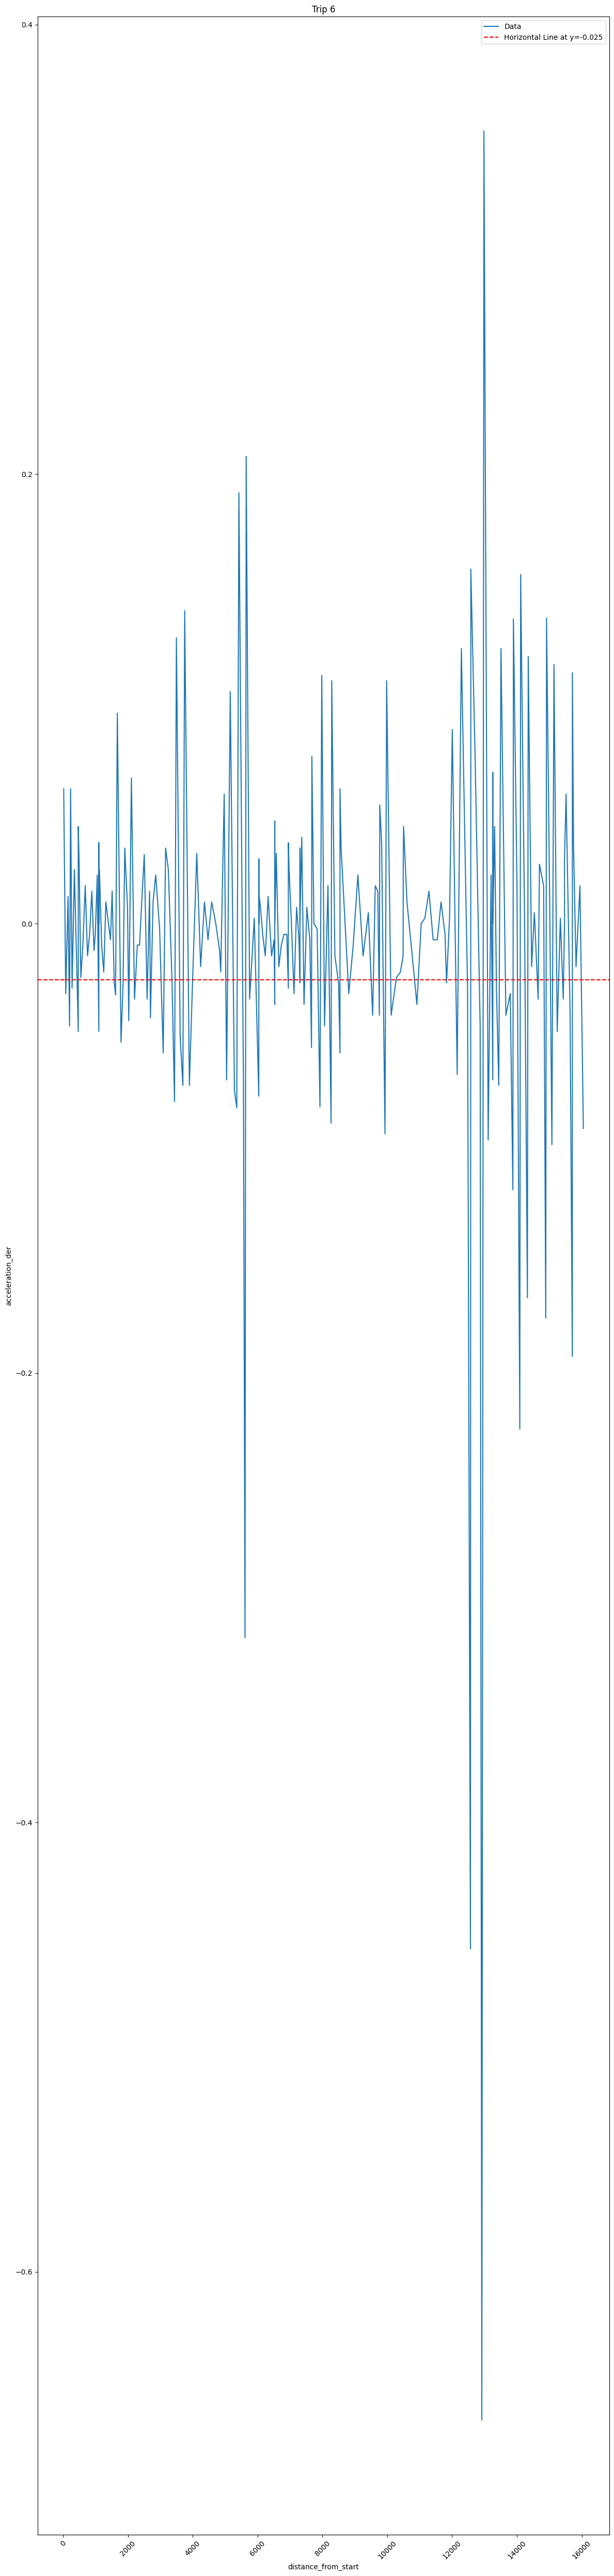

In [13]:
import matplotlib.pyplot as plt

columnx = 'distance_from_start'
columny = 'acceleration_der'
trip_id = 6

# Assuming 'data' is your DataFrame
df1 = data[(data['direction'] == 1) & (data['trip_id'] == 6)]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 50))

# Plot the data
ax.plot(df1[f"{columnx}"], df1[f"{columny}"], label='Data')
ax.set_xlabel(f"{columnx}")
ax.set_ylabel(f"{columny}")
ax.set_title("Trip " + str(trip_id))
ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

# Add a horizontal line at the desired y-value (e.g., y=0)
horizontal_line_y = -0.025  # Change this to the desired y-value
ax.axhline(horizontal_line_y, color='red', linestyle='--', label=f'Horizontal Line at y={horizontal_line_y}')

# Add a legend to the plot
ax.legend()

# Adjust layout for better formatting
plt.tight_layout()

# Show the plot
plt.show()


In [14]:
# take the mean of each feature grouped buy the deviceid and segment

# List of features you want to calculate the mean for
features_to_mean = ['deviceid','speed', 'acceleration', 'radial_acceleration']  # Replace with your actual feature names

# Group by 'deviceid' and 'segment', then calculate the mean for each feature
means = datain_one_direction.groupby(['trip_id', 'segment'])[features_to_mean].mean().reset_index()

# The 'means' DataFrame now contains the mean values for each feature, grouped by 'deviceid' and 'segment'
print(means)

       trip_id  segment  deviceid      speed  acceleration  \
0          2.0      0.0     116.0   6.414320     -0.073623   
1          2.0      1.0     116.0   7.199433     -0.227982   
2          2.0      2.0     116.0   8.140889      0.011076   
3          2.0      3.0     116.0   8.574518     -0.007302   
4          2.0      4.0     116.0  12.303306     -0.105420   
...        ...      ...       ...        ...           ...   
39659   5587.0      2.0     262.0   3.023758      0.166394   
39660   5587.0      3.0     262.0   2.221536     -0.021232   
39661   5587.0      4.0     262.0   2.429807      0.223977   
39662   5587.0      5.0     262.0   2.699783      0.393279   
39663   5587.0      6.0     262.0   7.183778      0.314882   

       radial_acceleration  
0                 0.345581  
1                 0.682900  
2                 0.469639  
3                 0.435498  
4                 0.376268  
...                    ...  
39659             0.078641  
39660             0.326

In [15]:
datain_one_direction

,id,deviceid,trip_id,speed,acceleration,radial_acceleration,distance_from_start,acceleration_der,bus_stop,segment
0,574733100,116,2.0,10.25920,-0.251980,1.278067,123.738485,-0.038397,0,1.0
1,574733101,116,2.0,7.55940,-0.179987,0.722300,163.044397,0.004800,0,1.0
2,574733102,116,2.0,3.77970,-0.251980,0.048332,211.472339,-0.004800,0,1.0
3,574736662,116,2.0,9.17927,0.359971,1.052222,287.492821,0.040797,101,0.0
4,574736663,116,2.0,8.63931,-0.035997,0.639311,343.141212,-0.026398,101,0.0
...,...,...,...,...,...,...,...,...,...,...
624811,1310920500,262,5587.0,2.15983,-0.057853,0.017268,16959.169925,-0.014922,0,6.0
624812,1310920499,262,5587.0,2.15983,0.000000,0.050073,17123.789768,0.001653,0,6.0
624813,1310920498,262,5587.0,2.69978,0.539950,0.056444,17175.357332,0.539950,0,6.0
624814,1310920497,262,5587.0,5.39957,0.674947,0.062833,17309.762484,0.033749,0,6.0


In [16]:
# Define the count_local_maxima_and_minima function
def count_local_maxima_and_minima(data):
    max_count = 0
    min_count = 0
    for i in range(1, len(data) - 1):
        if data['acceleration_der'].iloc[i] > data['acceleration_der'].iloc[i - 1] and \
           data['acceleration_der'].iloc[i] > data['acceleration_der'].iloc[i + 1] and \
           data['acceleration_der'].iloc[i] > 0.01:
            max_count += 1
        elif data['acceleration_der'].iloc[i] < data['acceleration_der'].iloc[i - 1] and \
             data['acceleration_der'].iloc[i] < data['acceleration_der'].iloc[i + 1] and \
             data['acceleration_der'].iloc[i] < -0.025:
            min_count += 1
    return max_count, min_count

# Group the data by 'segment' and 'trip_id' and apply the count_local_maxima_and_minima function to 'acceleration_der'
segment_maxima_minima_counts = datain_one_direction.groupby(['trip_id', 'deviceid', 'segment']).apply(count_local_maxima_and_minima)

# Convert the results into a DataFrame
segment_maxima_minima_counts = segment_maxima_minima_counts.apply(pd.Series)

# Reset the index to make 'trip_id', 'deviceid', and 'segment' regular columns
segment_maxima_minima_counts = segment_maxima_minima_counts.reset_index()

# Rename the columns for clarity
segment_maxima_minima_counts.columns = ['trip_id', 'deviceid', 'segment', 'throttle_count', 'break_count']

# The 'segment_maxima_minima_counts' DataFrame now contains the counts of local maxima and minima of 'acceleration_der' in each segment and trip_id
print(segment_maxima_minima_counts)


       trip_id  deviceid  segment  throttle_count  break_count
0          2.0       116      0.0              15           13
1          2.0       116      1.0               0            0
2          2.0       116      2.0               0            0
3          2.0       116      3.0               6            5
4          2.0       116      4.0               2            4
...        ...       ...      ...             ...          ...
39659   5587.0       262      2.0               2            1
39660   5587.0       262      3.0              10           10
39661   5587.0       262      4.0               4            4
39662   5587.0       262      5.0               4            3
39663   5587.0       262      6.0              20           17

[39664 rows x 5 columns]


In [17]:
# lef join means and segment_maxima_minima_counts on trip_id and segment
means_and_maxima_minima_counts = pd.merge(means, segment_maxima_minima_counts, on=['trip_id', 'segment'], how='left')

In [24]:
# print a list of unique trip ids
trip_ids = means_and_maxima_minima_counts['trip_id'].unique()
# convert the list values to int
trip_ids = [int(x) for x in trip_ids]
print('unique trip ids: {}'.format(trip_ids))
# print length
print('length of unique trip ids: {}'.format(len(trip_ids)))

unique trip ids: [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199, 201, 203, 205, 207, 209, 211, 213, 215, 226, 228, 230, 232, 234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258, 260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284, 286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310, 312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336, 338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358, 360, 362, 364, 366, 368, 370, 372, 374, 382, 384, 386, 388, 390, 392, 394, 396, 398, 400, 402, 404, 406, 408, 410, 412, 414, 416, 418, 420, 422, 424, 426, 428, 430, 432, 434

In [19]:
# save csv file
means_and_maxima_minima_counts.to_csv('../DataOut/means_and_maxima_minima_counts.csv',index=False)